<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Introduction to Clustering

## Icebreaker

Today we're talking about **clustering**. The canonical example use case is "user segmentation".

With your neighbour discuss what benefits you'd get in a business from using clustering to segment your users.

Why should we try and find groups of similar users?

# Unsupervised learning

Let's remind ourselves: what makes learning **unsupervised**?

Unsupervised learning means we don't know the answer ahead of time. In fact, there isn't a "true" answer at all

Today we'll talk about clustering, but other tasks fall under unsupervised learning e.g. anomaly detection, or dimensionality reduction (more on these next week)

## Clustering

Clustering is simply the automatic finding of similar groups of data points

In user segmentation our hypothesis is that "there are similar users"

Clustering helps us investigate this further

#### "What are groups of similar users?"

To answer this we want to know:

- how many plausible groups are there?

- what are the characteristics of these groups?

- which users are in which groups? (for existing and new customers)

# K-means Clustering

K-means clustering helps us answer "which users are close to other users?", but we need to do some of the work. Namely:

- we have to decide in advance how many clusters there are (we typically try different values of $k$ and compare)

- we have to analyse the properties of clusters after k-means has finished

- we have to decide if the clusters make sense!

K-means makes sure our clusters are far from each other, but the items in a cluster are close together. This is **all** that it optimises.

## The algorithm

- **1:** pick a value of $k$ (human)

- **2:** start with $k$ cluster centers ("centroids")

- **3:** assign each point to its closest centroid ("closest" = Euclidean distance)

- **4:** recalculate the centroids based on the items in each cluster (average the positions)

- **5:** repeat 3-4 until "convergence" (stop when we don't gain anything from continuing)

### Demo

[https://www.naftaliharris.com/blog/visualizing-k-means-clustering](https://www.naftaliharris.com/blog/visualizing-k-means-clustering)

### When do we stop?

- "iteration stops when centroids move less than the tolerance" ([http://scikit-learn.org/stable/modules/clustering.html#k-means](http://scikit-learn.org/stable/modules/clustering.html#k-means))

- tolerance can be specified (`tol` parameter)

- or stop after a number of iterations (`max_iter` parameter)

### Example: what are similar cars?

Car data (source: [Kaggle](https://www.kaggle.com/abineshkumark/carsdata/version/1))

In [1]:
import pandas as pd

cars = pd.read_csv("assets/data/cars.csv")

In [2]:
cars.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,14.0,8.0,350,165.0,4209,12.0,1972.0,US.
1,31.9,4.0,89,71.0,1925,14.0,1980.0,Europe.
2,17.0,8.0,302,140.0,3449,11.0,1971.0,US.
3,15.0,8.0,400,150.0,3761,10.0,1971.0,US.
4,30.5,4.0,98,63.0,2051,17.0,1978.0,US.


In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

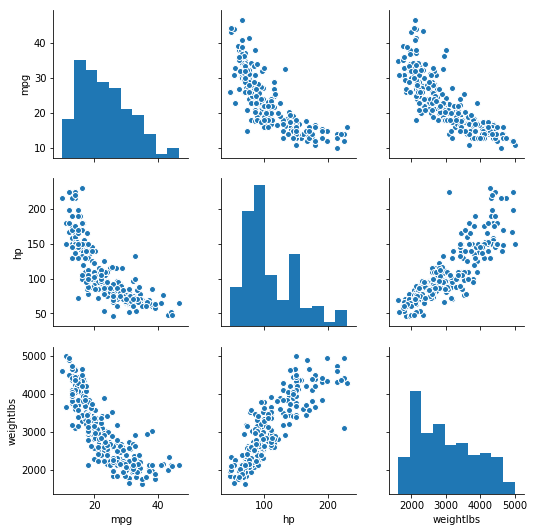

In [4]:
sns.pairplot(cars, vars=["mpg", "hp", "weightlbs"]);

In [5]:
from sklearn.cluster import KMeans

X = cars[["mpg", "hp", "weightlbs"]]

kmeans = KMeans(n_clusters=3, random_state=42)

clusters = kmeans.fit_predict(X)

clusters

array([2, 0, 1, 2, 0, 2, 2, 2, 1, 0, 0, 0, 2, 1, 2, 0, 1, 0, 0, 0, 0, 1,
       2, 0, 0, 0, 2, 1, 0, 0, 1, 0, 0, 1, 0, 1, 2, 1, 2, 1, 1, 1, 0, 2,
       0, 0, 1, 2, 1, 1, 0, 2, 2, 1, 0, 0, 2, 1, 0, 1, 0, 2, 1, 0, 0, 0,
       2, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 2, 2, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 2, 1, 0, 2, 2, 1, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 2,
       0, 0, 2, 1, 1, 0, 2, 0, 0, 2, 1, 0, 0, 2, 0, 0, 0, 0, 0, 2, 1, 2,
       2, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 2, 1, 0, 1, 0,
       0, 0, 1, 1, 2, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 2, 1, 1, 0,
       0, 2, 1, 0, 1, 1, 2, 2, 2, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 2, 0, 1, 2, 1, 1, 1, 0, 0, 1, 0, 0, 2, 0, 2, 1, 1, 2, 2, 2,
       0, 2, 0, 0, 1, 1, 0, 0, 2, 1, 0, 2, 1, 0, 0, 2, 1, 2, 0, 2, 1, 2,
       0, 0, 0, 0, 0, 1, 2, 1, 0, 2, 0, 1, 1, 1], dtype=int32)

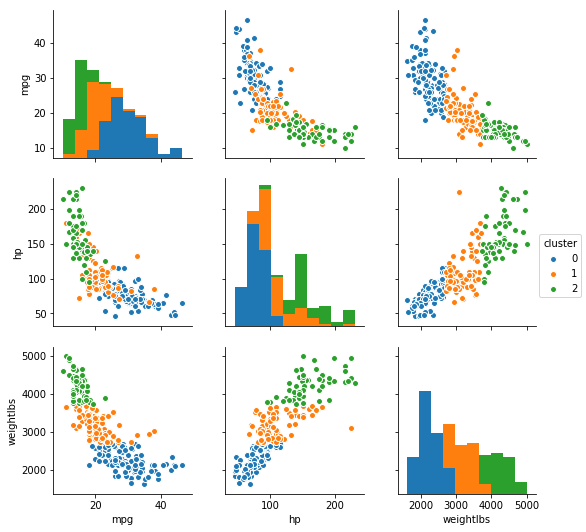

In [6]:
cars["cluster"] = clusters

sns.pairplot(cars, hue="cluster", vars=["mpg", "hp", "weightlbs"]);

### Can I use my data "as is"?

What could be the problem with using the data as is?

As with k-nearest neighbours, without scaling the bigger dimensions will dominate

Look at the "banding" in the weight dimensions

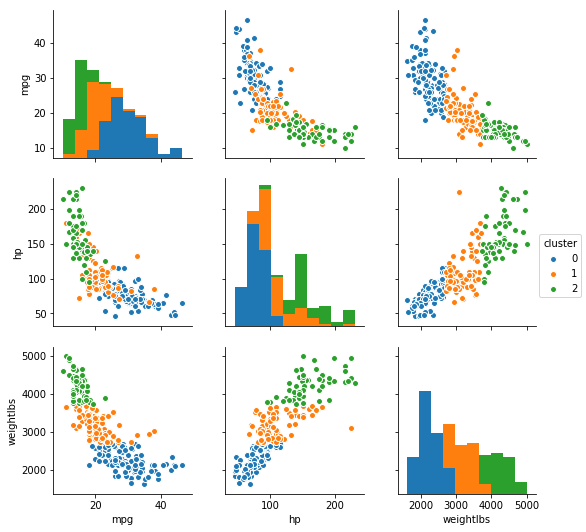

In [7]:
sns.pairplot(cars, hue="cluster", vars=["mpg", "hp", "weightlbs"]);

In [8]:
def show_cluster_boxplots(df, columns, cluster_column):
    fig, ax = plt.subplots(1, len(columns), figsize=(16, 8))

    for i, c in enumerate(columns):
        sns.boxplot(x=cluster_column, y=c, data=df, ax=ax[i])
        ax[i].set_title(f"Box plot of {c} by cluster")
    
    plt.show()

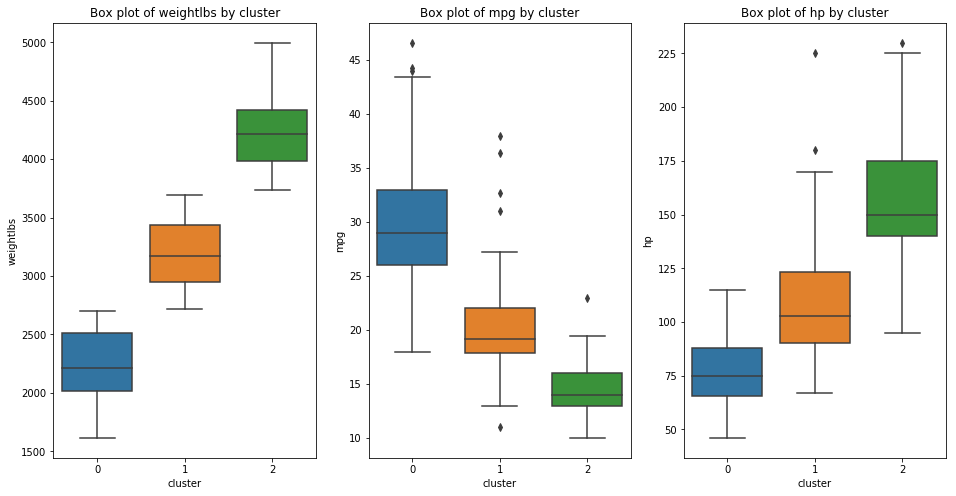

In [9]:
show_cluster_boxplots(cars, columns=["weightlbs", "mpg", "hp"], cluster_column="cluster")

Now with scaling

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(cars[["mpg", "hp", "weightlbs"]])

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X)

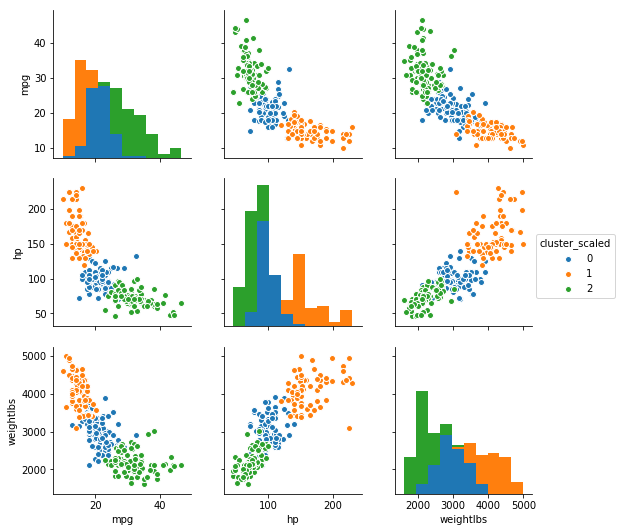

In [11]:
cars["cluster_scaled"] = clusters

sns.pairplot(cars, hue="cluster_scaled", vars=["mpg", "hp", "weightlbs"]);

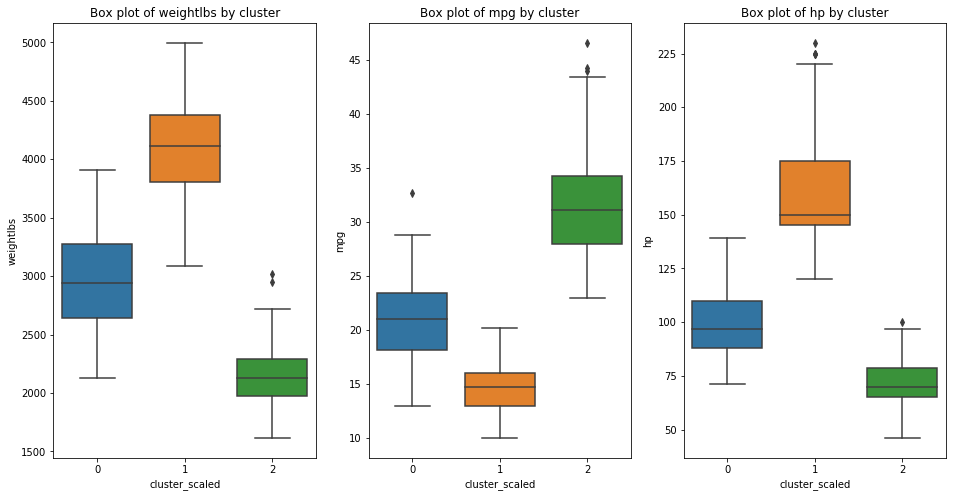

In [12]:
show_cluster_boxplots(cars, columns=["weightlbs", "mpg", "hp"], cluster_column="cluster_scaled")

## Evaluation & Tuning

How do we choose a value of $k$?

We can try different values and compare. But compare **what**?

**Inertia:** "sum of squared errors"

$$\sum_{j=0}^{n} (x_j - \mu_i)^2$$

For cluster $i$, "the sum of squared distances between all points $j$ from the centre $\mu_i$ of cluster $i$"

Ranges from 0 (all points = the centroid) to infinitely high values (so lower the better)

**Silhouette Score**: "how far apart are the clusters?"

Each point gets a silhouette score that ranges from:

**-1** ("this point should be in another cluster")

to **0** ("this point is on a cluster boundary")

to **1** ("this point is very close to its cluster centroid")

The more points are closer to 1 in all clusters the better

![](assets/images/silhouette_example.png)

<small>From <a href="http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py">http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py</a></small>

### Choosing $k$

In [13]:
def plot_inertia_values(k_min, k_max):
    inertia_values = []
    k_values = range(k_min, k_max+1)

    for k in k_values:
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(X)
        inertia_values.append(kmeans.inertia_)

    fig, ax = plt.subplots()
    ax.plot(k_values, inertia_values)
    ax.set_title("Inertia values for different $k$")
    ax.set_xlabel("k")
    ax.set_ylabel("Inertia")
    ax.set_ylim((0, 300))
    ax.set_xticks(k_values)
    plt.show()

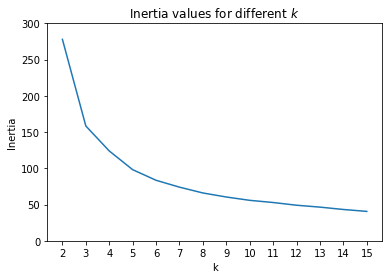

In [14]:
plot_inertia_values(k_min=2, k_max=15)

As with machine learning in general, increasing complexity will increase the "fit"

In [16]:
kmeans = KMeans(n_clusters=len(X))
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=256, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [17]:
kmeans.inertia_

0.0

The "elbow method" helps find a balance

### Investigating clusters

In [18]:
cars.groupby("cluster_scaled")["brand"].value_counts()

cluster_scaled  brand   
0                US.        64
                 Europe.    16
                 Japan.     14
1                US.        70
                 Europe.     2
2                Japan.     37
                 Europe.    29
                 US.        24
Name: brand, dtype: int64

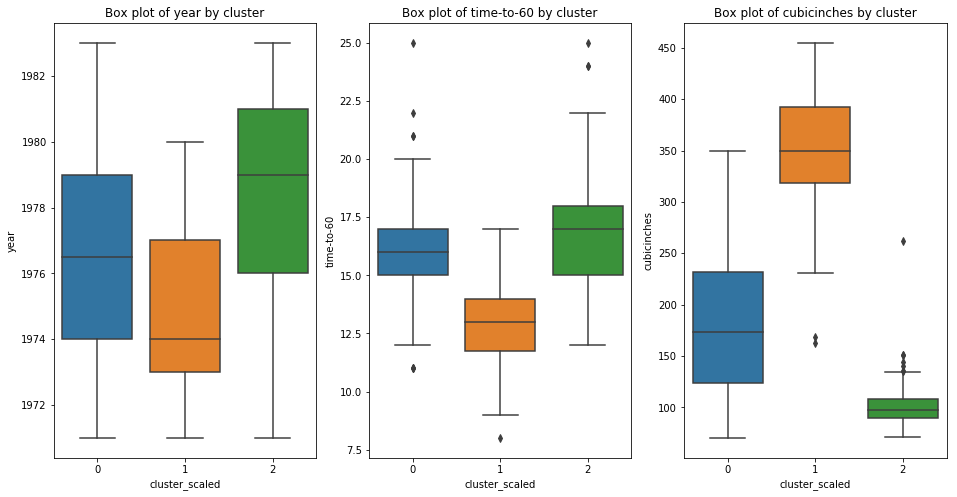

In [19]:
show_cluster_boxplots(cars, columns=["year", "time-to-60", "cubicinches"], cluster_column="cluster_scaled")

So maybe our 3 clusters are:

1) Mid-size, medium heavy US cars spread across all years

2) Heavy, powerful US cars ("muscle cars"?)

3) Large, less powerful but more fuel efficient cars

This is the kind of subjective evaluation you'd take to your experts for validation!

### Pros & Cons

#### Pros

- can find structure automatically = shows us what's actually in the data

- intuitive to understand & interrogate the results

#### Cons

- element of randomness (might not always get the same results)

- we have to choose $k$ = hard to do

### Clustering time series

How could we cluster different time series data (e.g. closing prices for cryptocurrencies)?

In [21]:
# read in raw time series
crypto_raw = pd.read_csv("assets/data/cryptocurrencies.csv")
# convert to date
crypto_raw["date"] = pd.to_datetime(crypto_raw["date"])
# aggregate to monthly
crypto = crypto_raw.set_index("date").groupby("symbol").resample("MS")["close"].mean().reset_index()
# drop those that don't have 12 values
counts = crypto["symbol"].value_counts().reset_index()
symbols_to_keep = counts.loc[counts["symbol"] == 12, "index"]
crypto = crypto[crypto["symbol"].isin(symbols_to_keep)]

def plot_currencies(exclude=None):
    symbols = crypto["symbol"].unique()
    
    if exclude:
        symbols = [s for s in symbols if s not in exclude]

    fig, ax = plt.subplots()

    for s in symbols:
        symbol_data = crypto[crypto["symbol"] == s]
        ax.plot(symbol_data["date"], symbol_data["close"], label=s)

    ax.legend()
    plt.show()

In [22]:
crypto.head(13)

,symbol,date,close
5,BTC,2017-01-01,909.679355
6,BTC,2017-02-01,1061.324643
7,BTC,2017-03-01,1129.273871
8,BTC,2017-04-01,1215.241000
9,BTC,2017-05-01,1877.569677
10,BTC,2017-06-01,2632.285667
11,BTC,2017-07-01,2525.737097
12,BTC,2017-08-01,3878.901935
13,BTC,2017-09-01,4095.673000
14,BTC,2017-10-01,5351.401290


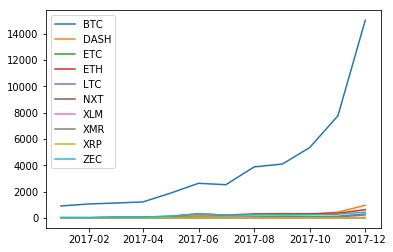

In [23]:
plot_currencies()

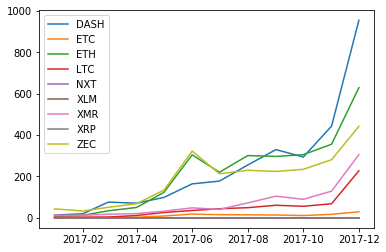

In [24]:
plot_currencies(exclude=["BTC"])

In [25]:
pivoted = crypto[crypto["symbol"] != "BTC"].pivot(columns="date", index="symbol")
pivoted.head()

close                                                           \
date   2017-01-01 2017-02-01 2017-03-01 2017-04-01  2017-05-01  2017-06-01   
symbol                                                                       
DASH    13.526129  20.126786  76.316452  71.112000   98.938710  164.307000   
ETC      1.350645   1.277500   1.836129   3.281000    9.241613   18.438000   
ETH     10.160000  12.391071  34.475161  50.450667  123.182903  304.448333   
LTC      3.968710   3.839643   4.260323  11.772333   26.048387   35.965000   
NXT      0.005900   0.007582   0.009553   0.019965    0.053245    0.137215   

                                                                                
date    2017-07-01  2017-08-01  2017-09-01  2017-10-01  2017-11-01  2017-12-01  
symbol                                                                          
DASH    177.847097  255.426774  329.872000  294.004516  443.396333  954.465484  
ETC      15.701613   14.924839   13.996000   11.408065   17.449667   29.507097  
ETH     220.562903  301.055806  296.973333  305.404194  355.890333  628.818387  
LTC      44.331613   49.463548   61.129000   56.106129   68.519000  227.620968  
NXT       0.106188    0.123906    0.079595    0.064525    0.094386    0.819474

In [26]:
kmeans = KMeans(n_clusters=2)
clusters = kmeans.fit_predict(pivoted)

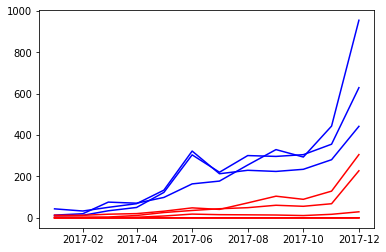

In [27]:
fig, ax = plt.subplots()

colours = ["r", "b", "m"]

for i, s in enumerate(pivoted.index.values):
    symbol_data = crypto[crypto["symbol"] == s]
    cluster_idx = clusters[i]
    ax.plot(symbol_data["date"], symbol_data["close"], c=colours[cluster_idx])

plt.show()

### Clustering images

How could clustering be used in image data?

Treat each pixel as an RGB vector (Red: 0-255, Green: 0-255, Blue: 0-255)

![](assets/images/red_panda.jpg)

In [25]:
# to get access to the Python Image Library, use "conda install pillow"
from PIL import Image

img = Image.open('assets/images/red_panda.jpg')
pix = img.load()

rgb_vectors = []
for x in range(img.width):
    for y in range(img.height):
        rgb_vec = pix[x,y]
        rgb_vectors.append(rgb_vec)

print("Original image: {} pixels, {} unique colours".format(len(rgb_vectors), len(set(rgb_vectors))))

Original image: 50400 pixels, 36932 unique colours


In [27]:
img_df = pd.DataFrame(columns=['r', 'g', 'b'])
img_df['r'] = [x[0] for x in rgb_vectors]
img_df['g'] = [x[1] for x in rgb_vectors]
img_df['b'] = [x[2] for x in rgb_vectors]
img_df.head()

,r,g,b
0,171,165,153
1,181,175,163
2,188,180,169
3,191,182,173
4,193,183,174


In [35]:
k_values = [3, 5, 12, 25]

for i in range(len(k_values)):
    k = k_values[i]
    # run clustering
    print("Running clustering for k=%d" % k)
    kmeans = KMeans(n_clusters=k)
    clusters = kmeans.fit_predict(img_df)
    img_df['cluster'] = clusters
    # use the K cluster centroids as new colours to represent the image
    colours = [tuple([int(c) for c in x]) for x in kmeans.cluster_centers_]
    # create a new image file
    new_img = Image.new('RGB', (img.width, img.height))
    img_data = new_img.load()
    counter = 0
    for x in range(img.width):
        for y in range(img.height):
            # get cluster index from DF
            cluster = img_df.loc[counter,'cluster']
            # get associated colour
            cluster_colour = colours[cluster]
            # add coloured pixel to new image
            img_data[x,y] = cluster_colour
            counter += 1
    new_img_name = 'assets/images/red_panda_{}.jpg'.format(k)
    new_img.save(new_img_name)
print('Done!')

Running clustering for k=3
Running clustering for k=5
Running clustering for k=12
Running clustering for k=25
Done!


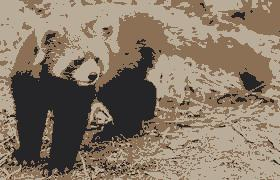

In [32]:
from IPython.display import Image as display_image

display_image("assets/images/red_panda_3.jpg")

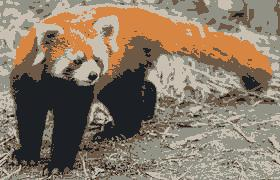

In [33]:
display_image("assets/images/red_panda_5.jpg")

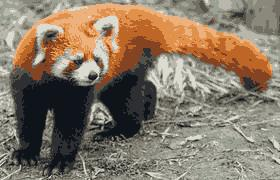

In [34]:
display_image("assets/images/red_panda_12.jpg")

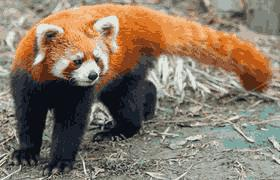

In [36]:
display_image("assets/images/red_panda_25.jpg")

## What else?

### Improving K-means

K-means is designed for **continuous** variables

There are variations available for categorical values (apart from just creating dummies)

**K-modes**: k-means clustering for categorical variables

**K-prototypes**: mixing both numeric and categorical values

Papers and Python code available here: [https://github.com/nicodv/kmodes](https://github.com/nicodv/kmodes)

### Other Algorithms

#### Density-based clustering (DBSCAN)

- uses density rather than just "distance to centre"

- can help find outliers (not all items assigned to cluster)

#### Hierarchical clustering

- finds clusters within clusters all the way down

- non-random, doesn't depend on initialisation

Tutorial available here: [https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/](https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/)

## Exercise